In [15]:
from keras.datasets import cifar10
((X_train,y_train),(X_test,y_test)) = cifar10.load_data()

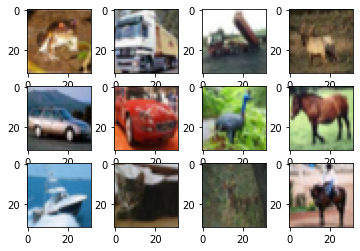

In [16]:
import matplotlib.pyplot as plt
for i in range(12):
 plt.subplot(3,4,0+i+1)
 plt.imshow(X_train[i])
plt.show()

In [17]:
#0-plane 
#1-car
#2-bird 
#3-cat
#4-goat
#5-dog
#6-frog 
#7-horse
#8-boat 
#9-truck

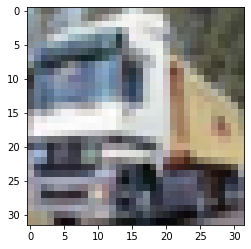

Labele: [9]


In [18]:
IMG = X_train[1]
plt.imshow(IMG)
plt.show()
print('Labele:',y_train[1])

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [20]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

# Create model
model = Sequential()

# Build Layer
model.add(Conv2D(32, (3,3), padding = 'same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(10)) #number of class
model.add(Activation('softmax'))

# Model complete
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [22]:
# Train model
from keras.optimizers import SGD, Adam, RMSprop
model.compile(loss='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
CNN = model.fit(X_train,y_train,batch_size = 120, epochs = 10, validation_split = 0.2)
score = model.evaluate(X_test,y_test,batch_size = 120, verbose = 1)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Epoch 1/10
334/334 [==============================] - 120s 356ms/step - loss: 1.7995 - accuracy: 0.3465 - val_loss: 1.6557 - val_accuracy: 0.4239
Epoch 2/10
334/334 [==============================] - 118s 354ms/step - loss: 1.3466 - accuracy: 0.5190 - val_loss: 1.2240 - val_accuracy: 0.5586
Epoch 3/10
334/334 [==============================] - 133s 398ms/step - loss: 1.1290 - accuracy: 0.5994 - val_loss: 1.0384 - val_accuracy: 0.6267
Epoch 4/10
334/334 [==============================] - 125s 373ms/step - loss: 1.0012 - accuracy: 0.6485 - val_loss: 0.8923 - val_accuracy: 0.6852
Epoch 5/10
334/334 [==============================] - 127s 381ms/step - loss: 0.8991 - accuracy: 0.6851 - val_loss: 1.1091 - val_accuracy: 0.6256
Epoch 6/10
334/334 [==============================] - 125s 374ms/step - loss: 0.8326 - accuracy: 0.7089 - val_loss: 0.8235 - val_accuracy: 0.7081
Epoch 7/10
334/334 [==============================] - 119s 355ms/step - loss: 0.7679 - accuracy: 0.7329 - val_loss: 0.8284 -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


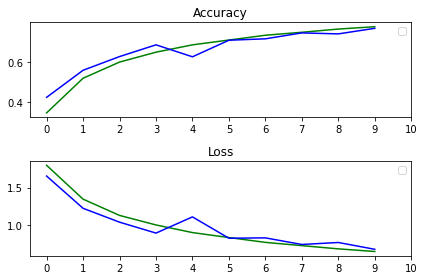

In [25]:
import numpy as np

# Accuracy
plt.subplot(211)
plt.title('Accuracy')
plt.plot(CNN.history['accuracy'],color = 'g')
plt.plot(CNN.history['val_accuracy'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,11,1))

# Loss
plt.subplot(212)
plt.title('Loss')
plt.plot(CNN.history['loss'],color = 'g')
plt.plot(CNN.history['val_loss'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,11,1))

plt.tight_layout()
plt.show()

Position of number:16
1/1 [==============================] - 0s 16ms/step
5


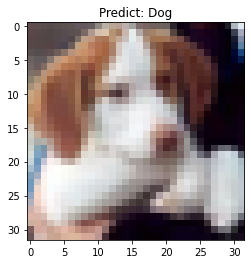

In [30]:
Label = ['Airplane', 'Automobile', 'Bird', 'Cat',
         'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

num = int(input('Position of number:'))
num_predict = np.argmax(model.predict(X_test[num].reshape((1,32,32,3))))
plt.title("Predict: " + str(Label[num_predict]))
plt.imshow(X_test[num],cmap=plt.get_cmap('gray'))
print(num_predict)